Importation des librairies et des données :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import time

In [2]:
# Decimal = ',' hyper important pour que python comprenne les nombres
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")

Sélection des variables "heure de premier départ" pour chaque individu :


In [3]:
premiers_departs = data.groupby('IDENT_MEN')['HEURE_DEPART'].min()

In [4]:
premiers_departs

IDENT_MEN
1100000114000    14.25
1100000115000     7.75
1100000135000    15.00
1100000136000     7.25
1100000144000     8.50
                 ...  
9400000361000    16.00
9400000364000     5.25
9400000415000    10.00
9400000441000     8.00
9400000521000     6.00
Name: HEURE_DEPART, Length: 7105, dtype: float64

<Axes: >

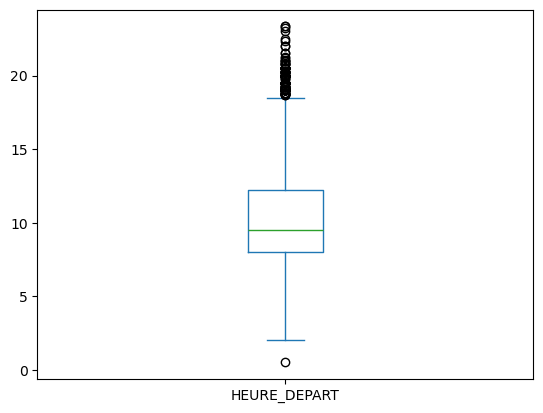

In [6]:
premiers_departs.plot.box()

In [7]:
premiers_departs.describe()

count    7105.000000
mean       10.364668
std         3.404996
min         0.500000
25%         8.000000
50%         9.500000
75%        12.250000
max        23.333333
Name: HEURE_DEPART, dtype: float64

Un premier aperçu de ces données :

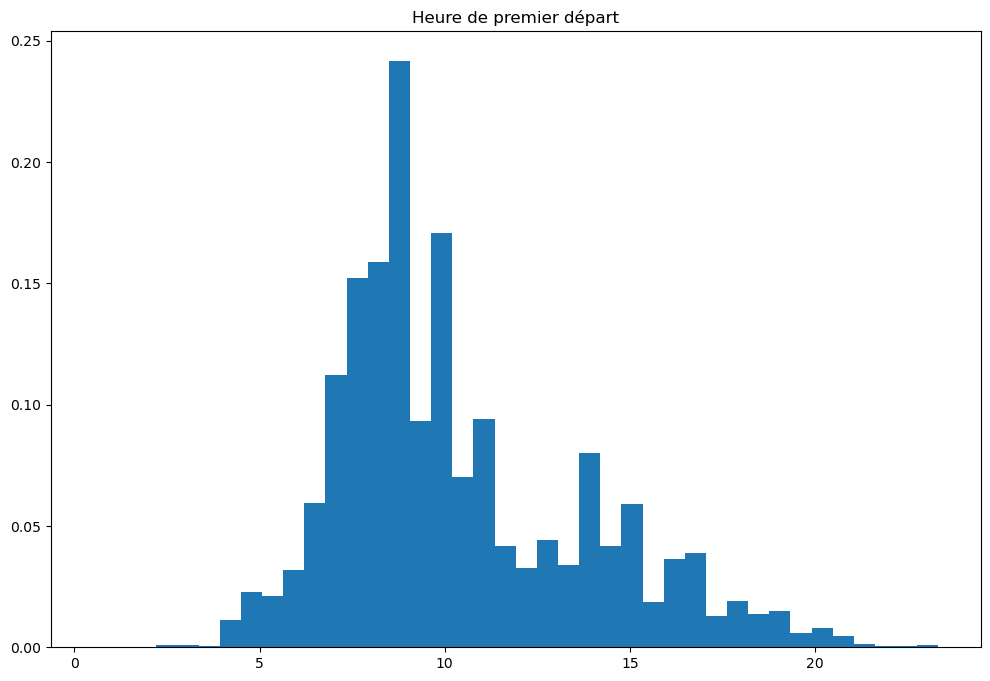

In [5]:
y, x = np.histogram(premiers_departs, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True)
plt.title("Heure de premier départ")
plt.show()

Programme essayant de trouver la meilleure loi de modélisation :

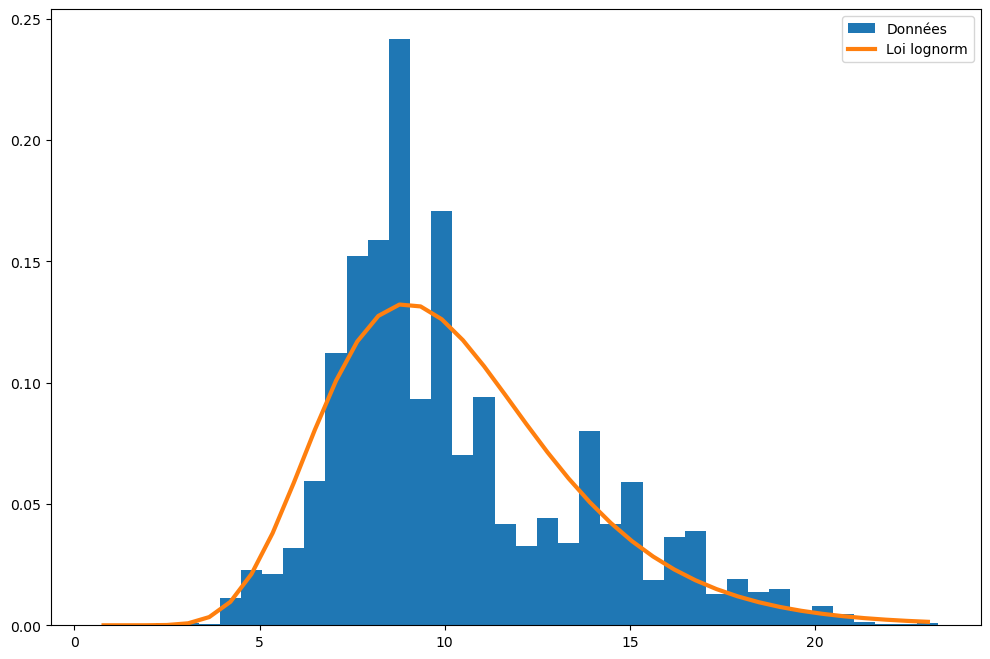

Selected Model :  lognorm
Loc. param. :  -0.6029475032341607
Scale param. :  10.479218557950835
Other arguments :  (0.30048107228193904,)
SSE :  0.03077484516414204


In [7]:
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgauss',  'loggamma', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(premiers_departs)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(premiers_departs, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Deuxième étape :
Modéliser plus de lois pour être plus précis en fonction de 4 plages horaires.

In [6]:
display(premiers_departs)

IDENT_MEN
1100000114000    14.25
1100000115000     7.75
1100000135000    15.00
1100000136000     7.25
1100000144000     8.50
                 ...  
9400000361000    16.00
9400000364000     5.25
9400000415000    10.00
9400000441000     8.00
9400000521000     6.00
Name: HEURE_DEPART, Length: 7105, dtype: float64

In [7]:
prem_dep_0_11 = premiers_departs[premiers_departs <= 11]
prem_dep_11_14 = premiers_departs[premiers_departs.between(11,14)]
prem_dep_14_17 = premiers_departs[premiers_departs.between(14,17)]
prem_dep_17_0 = premiers_departs[17< premiers_departs]

# 0H-11H :

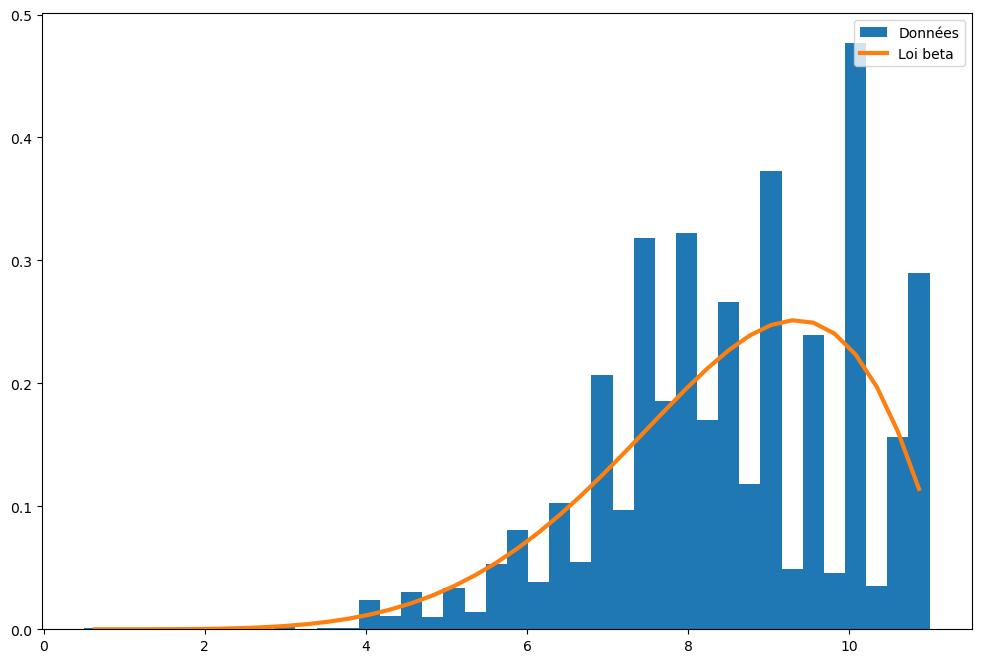

Selected Model :  beta
Loc. param. :  0.06685265130136121
Scale param. :  11.342067824388597
Other arguments :  (6.4062176239919975, 2.2025485309084734)
SSE :  0.29038379980067136


In [8]:
y, x = np.histogram(prem_dep_0_11, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_matin, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_0_11)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_0_11, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 11H-14H :

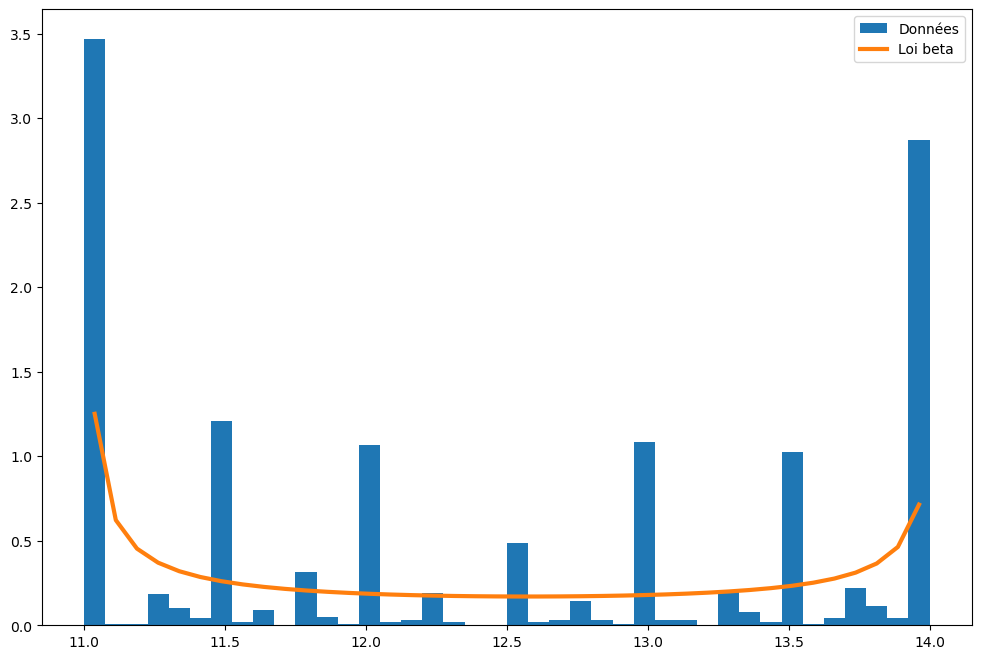

Selected Model :  beta
Loc. param. :  10.999999999999998
Scale param. :  3.0299865111028055
Other arguments :  (0.35036070721082846, 0.3993601425106533)
SSE :  14.421973537436042


In [9]:
y, x = np.histogram(prem_dep_11_14, bins=40, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_11_14)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_11_14, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

**Note : 73,3% des premiers départs ont lieu le matin.**

# 14H-17H

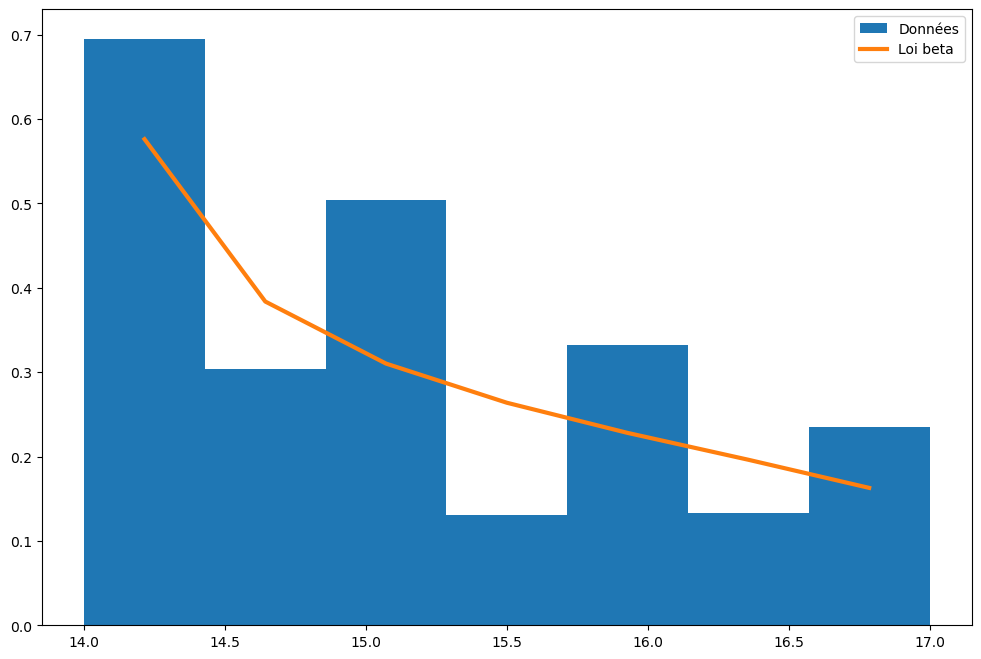

Selected Model :  beta
Loc. param. :  13.999999999999998
Scale param. :  3.3503898538352734
Other arguments :  (0.660658141884473, 1.229382317387999)
SSE :  0.09602800469663593


In [10]:
y, x = np.histogram(prem_dep_14_17, bins=7, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_14_17)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_14_17, bins=7, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# 17H-00H

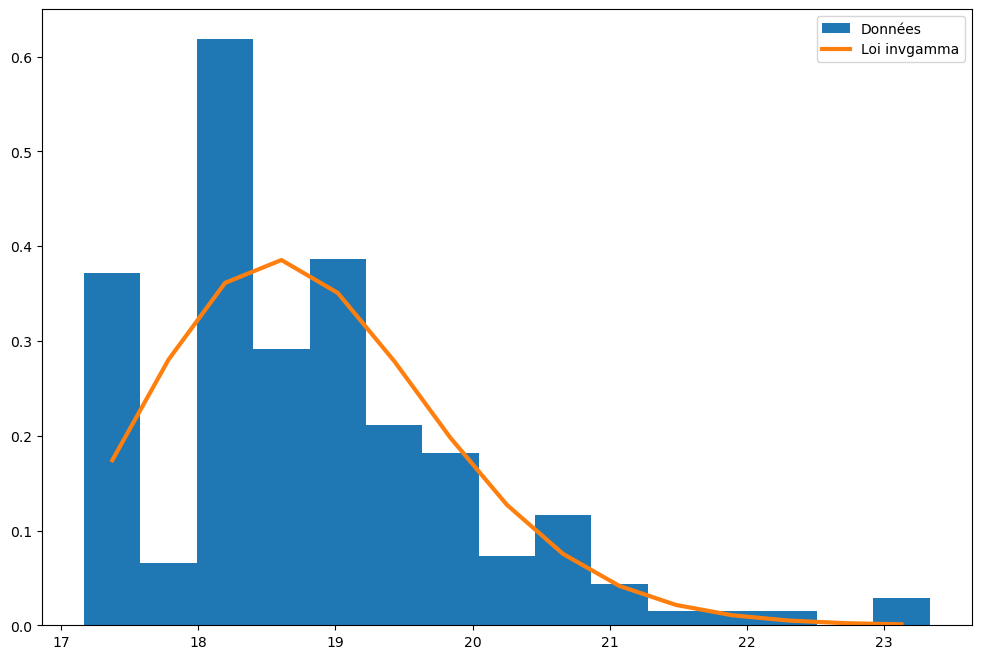

Selected Model :  invgamma
Loc. param. :  8.708040868448236
Scale param. :  914.7575678540184
Other arguments :  (91.88535881107782,)
SSE :  0.17211827819984848


In [11]:
y, x = np.histogram(prem_dep_17_0, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_17_0)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_17_0, bins=15, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

## Séparation semaine - week-end :

In [9]:
prem_dep_semaine = data[data.TYPE_jour.isin(['lundi','mardi','mercredi','jeudi','vendredi'])].groupby('IDENT_MEN')['HEURE_DEPART'].min()
prem_dep_weekend = data[data.TYPE_jour.isin(['samedi','dimanche'])].groupby('IDENT_MEN')['HEURE_DEPART'].min()

# Premier départ la semaine :

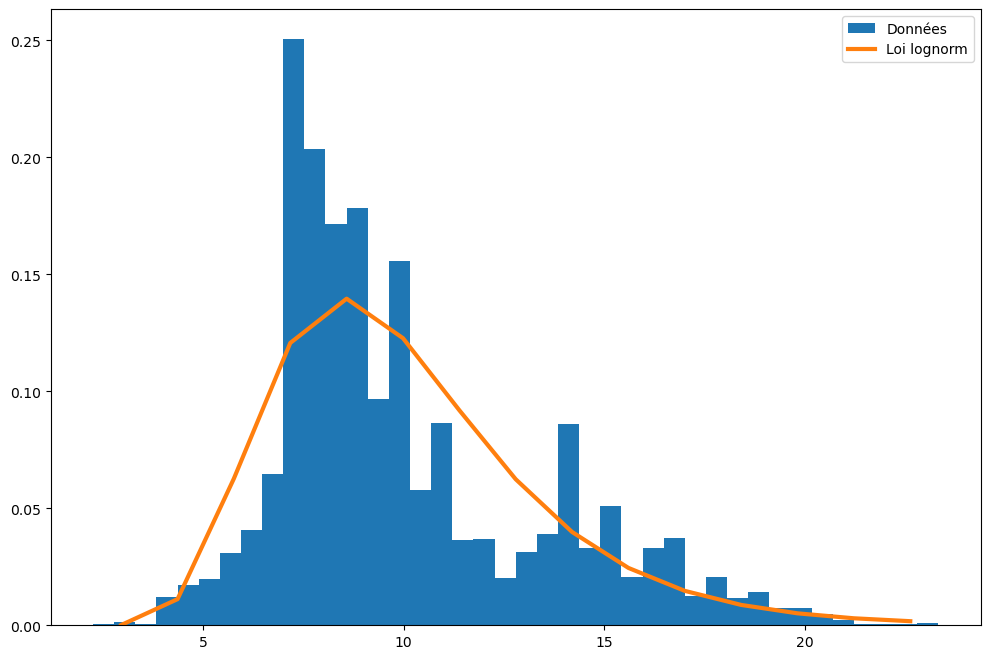

Selected Model :  lognorm
Loc. param. :  1.0420034781383718
Scale param. :  8.47130160222838
Other arguments :  (0.35967648946202424,)
SSE :  0.007336863045067754


In [10]:
y, x = np.histogram(prem_dep_semaine, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm',  'loggamma', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_semaine)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_semaine, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

# Premier départ le week-end :

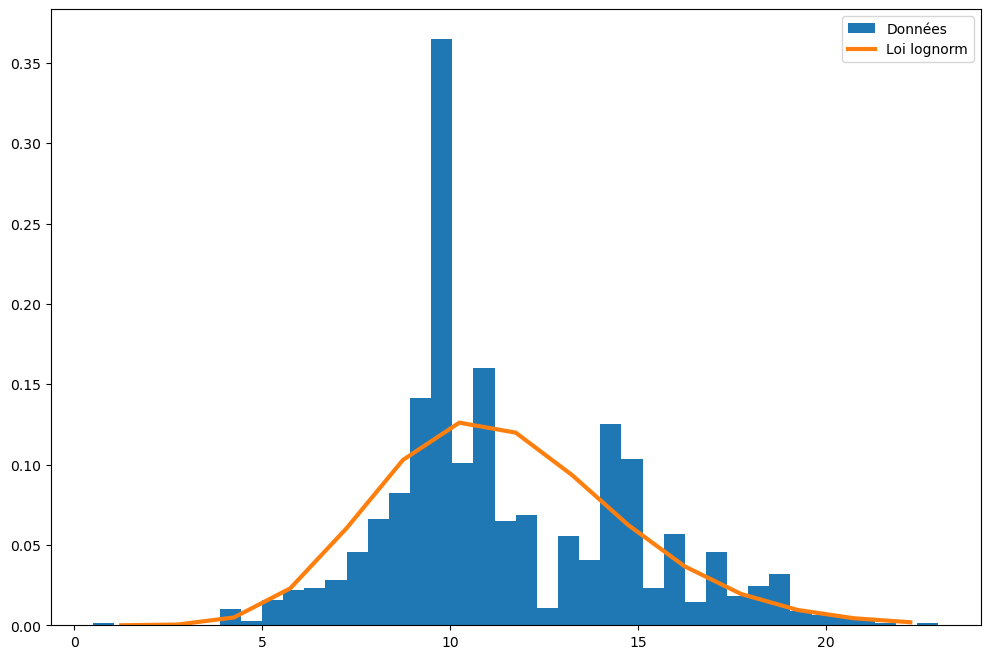

Selected Model :  lognorm
Loc. param. :  -7.495395199383772
Scale param. :  18.683841722745754
Other arguments :  (0.17029833486431253,)
SSE :  0.00764032552040814


In [13]:
y, x = np.histogram(prem_dep_weekend, bins=15, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
#plt.figure(figsize=(12,8))
#plt.hist(prem_dep_aprem, bins=40, density=True)
#plt.title("Heures de premier départ")
#plt.show()


dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'chi', 'chi2']
sse = np.inf

# Pour chaque distribution
for name in dist_names:

  # Modéliser
  dist = getattr(scipy.stats, name)
  param = dist.fit(prem_dep_weekend)

  # Paramètres
  loc = param[-2]
  scale = param[-1]
  arg = param[:-2]

  # PDF
  pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
  # SSE
  model_sse = np.sum((y - pdf)**2)

  # Si le SSE est diminué, enregistrer la loi
  if model_sse < sse :
    best_pdf = pdf
    sse = model_sse
    best_loc = loc
    best_scale = scale
    best_arg = arg
    best_name = name

plt.figure(figsize=(12,8))
plt.hist(prem_dep_weekend, bins=40, density=True, label="Données")
plt.plot(x, best_pdf, label="Loi " + best_name, linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)